# Predicting Show-Up/No-Show

In [56]:
#Importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()



import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

sns.set_style('darkgrid')

In [57]:
data = pd.read_csv("No-show-Issue-Comma-300k.csv")

In [58]:
data.head()

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,19,M,2014-12-16T14:46:25Z,2015-01-14T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-29
1,24,F,2015-08-18T07:01:26Z,2015-08-19T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-1
2,4,F,2014-02-17T12:53:46Z,2014-02-18T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,-1
3,5,M,2014-07-23T17:02:11Z,2014-08-07T00:00:00Z,Thursday,Show-Up,0,0,0,0,0,0,0,1,-15
4,38,M,2015-10-21T15:20:09Z,2015-10-27T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,1,-6


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Age                      300000 non-null  int64 
 1   Gender                   300000 non-null  object
 2   AppointmentRegistration  300000 non-null  object
 3   ApointmentData           300000 non-null  object
 4   DayOfTheWeek             300000 non-null  object
 5   Status                   300000 non-null  object
 6   Diabetes                 300000 non-null  int64 
 7   Alcoolism                300000 non-null  int64 
 8   HiperTension             300000 non-null  int64 
 9   Handcap                  300000 non-null  int64 
 10  Smokes                   300000 non-null  int64 
 11  Scholarship              300000 non-null  int64 
 12  Tuberculosis             300000 non-null  int64 
 13  Sms_Reminder             300000 non-null  int64 
 14  AwaitingTime        

In [60]:
data.describe()

,Age,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,37.808017,0.077967,0.025010,0.215890,0.020523,0.052370,0.096897,0.000450,0.574173,-13.841813
std,22.809014,0.268120,0.156156,0.411439,0.155934,0.222772,0.295818,0.021208,0.499826,15.687697
min,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-398.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-20.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-8.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-4.000000
max,113.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,2.000000,-1.000000


In [61]:
columns=[ 'Gender','DayOfTheWeek','Status','Diabetes','Alcoolism','HiperTension','Handcap','Smokes','Scholarship','Tuberculosis','Sms_Reminder']
for col in columns:
    print(col,data[col].unique())


Gender ['M' 'F']
DayOfTheWeek ['Wednesday' 'Tuesday' 'Thursday' 'Friday' 'Monday' 'Saturday' 'Sunday']
Status ['Show-Up' 'No-Show']
Diabetes [0 1]
Alcoolism [0 1]
HiperTension [0 1]
Handcap [0 1 2 3 4]
Smokes [0 1]
Scholarship [0 1]
Tuberculosis [0 1]
Sms_Reminder [0 1 2]


In [62]:
data[data.Age<0]

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
63390,-1,F,2014-03-14T11:39:20Z,2014-03-21T00:00:00Z,Friday,No-Show,0,0,0,0,0,0,0,1,-7
90973,-1,F,2013-12-26T08:21:55Z,2014-01-30T00:00:00Z,Thursday,Show-Up,0,0,0,0,0,0,0,1,-35
170051,-1,F,2015-07-30T07:48:10Z,2015-08-20T00:00:00Z,Thursday,Show-Up,0,0,0,0,0,0,0,1,-21
170598,-1,F,2015-05-11T15:39:33Z,2015-05-18T00:00:00Z,Monday,Show-Up,0,0,0,0,0,0,0,1,-7
272820,-2,F,2013-12-18T16:09:18Z,2014-01-07T00:00:00Z,Tuesday,No-Show,0,0,0,0,0,0,0,1,-20
281909,-1,F,2014-01-23T11:23:22Z,2014-01-24T00:00:00Z,Friday,Show-Up,0,0,0,0,0,0,0,0,-1


In [63]:
#delet patiend whose age =-1
data.drop([63390,90973,170051,170598,272820,281909],axis=0,inplace=True)
data[data.Age<0]

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime


In [64]:
data.shape

(299994, 15)

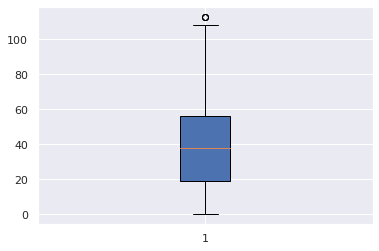

In [65]:
plt.boxplot(data['Age'],patch_artist=True);

In [66]:
data["Status"].value_counts()

Show-Up    209265
No-Show     90729
Name: Status, dtype: int64

In [67]:
data["Gender"].value_counts()

F    200499
M     99495
Name: Gender, dtype: int64

### Exploratory Data Analysis 

### What percentage of patients show up for their appointments?

In [68]:
proportion_status = data["Status"].value_counts() / sum(data["Status"].value_counts())
print("The percentage of patients that showed up for the appointment is about {}%."
      .format(round(proportion_status["Show-Up"],4)*100))

The percentage of patients that showed up for the appointment is about 69.76%.


In [69]:
print("The percentage of patients that didn't show up for the appointment is about {}%."
      .format(round(proportion_status["No-Show"],4)*100))

The percentage of patients that didn't show up for the appointment is about 30.240000000000002%.


### Cleaning Data 

In [70]:
#Handicap column has five different values(0,1,2,3,4) so I converted (1,2,3,4) to 1 that means handicap and 0 not handicapped
def replace_value(num):
    if num>0 :
        return 1
    else:
        return 0
data['Handcap']=data['Handcap'].apply(replace_value)
data.Handcap.unique()

array([0, 1])

In [71]:

data.rename(columns={'Sms_Reminder':'SMSReminder'},inplace=True)
data.rename(columns={'ApointmentData':'AppointmentData'},inplace = True)
data.rename(columns={'Alcoolism':'Alcoholism'},inplace = True)

In [72]:
data.head()    


,Age,Gender,AppointmentRegistration,AppointmentData,DayOfTheWeek,Status,Diabetes,Alcoholism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,SMSReminder,AwaitingTime
0,19,M,2014-12-16T14:46:25Z,2015-01-14T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-29
1,24,F,2015-08-18T07:01:26Z,2015-08-19T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-1
2,4,F,2014-02-17T12:53:46Z,2014-02-18T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,-1
3,5,M,2014-07-23T17:02:11Z,2014-08-07T00:00:00Z,Thursday,Show-Up,0,0,0,0,0,0,0,1,-15
4,38,M,2015-10-21T15:20:09Z,2015-10-27T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,1,-6


In [73]:
#convert to datetime type  
data['AppointmentData']=pd.to_datetime(data['AppointmentData']).dt.strftime('%Y-%m-%d')
data['AppointmentData']=pd.to_datetime(data['AppointmentData'])
data['AppointmentRegistration']=pd.to_datetime(data['AppointmentRegistration']).dt.strftime('%Y-%m-%d')
data['AppointmentRegistration']=pd.to_datetime(data['AppointmentRegistration'])

In [74]:
#convert to category type   
data['Gender']=data['Gender'].astype('category')  
data['Status']=data['Status'].astype('category')

In [ ]:
#convert to string type
#integer_columns=['AppointmentData','AppointmentRegistration','DayOfTheWeek','HiperTension','Diabetes','Alcoholism','Handcap','Smokes''Scholarship','Tuberculosis','SMSReminder','AwaitingTime']
#for col in integer_columns:
 #   df[col]=df[col].astype(str)

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299994 entries, 0 to 299999
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Age                      299994 non-null  int64         
 1   Gender                   299994 non-null  category      
 2   AppointmentRegistration  299994 non-null  datetime64[ns]
 3   AppointmentData          299994 non-null  datetime64[ns]
 4   DayOfTheWeek             299994 non-null  object        
 5   Status                   299994 non-null  category      
 6   Diabetes                 299994 non-null  int64         
 7   Alcoholism               299994 non-null  int64         
 8   HiperTension             299994 non-null  int64         
 9   Handcap                  299994 non-null  int64         
 10  Smokes                   299994 non-null  int64         
 11  Scholarship              299994 non-null  int64         
 12  Tuberculosis    

### Data Exploration

##### Factors to consider in determining whether a patient will show up for their scheduled appointment.

The relationship between the showing up of the patient and whether this patient has hypertension, diabetes, handicap, or alcoholism will be analysed. To do this, a function that takes the column name of the disease and the disease name and then prints the percentage of showing up in case of having or not having this disease and lastly visualizing these results will be implemented.



In [76]:
def print_stat_plot(column_name, disease_name):
    """
    print the percentage of showing up in case of having or not having a disease and  visualize these results
    
    INPUT:
    column_name: The name of the column in the dataframe.
    disease_name: The disease name that will be shown in the title and labels of the plot.
    
    """
    
    # A pandas series that contains the number of patients that showed up and didn't show up 
    #if they don't have the disease
    no_disease = data.query(' {} == 0'.format(column_name))["Status"].value_counts()
    
    # The percentage of the patients that showed up and don't have the disease
    no_disease_showup = no_disease["No-Show"] / sum(no_disease)
    
    # A pandas series that contains the number of patients that showed up and didn't show up 
    #if they have the disease
    disease = data.query(' {} != 0'.format(column_name))["Status"].value_counts()
    
    # The percentage of the patients that showed up and have the disease
    disease_showup = disease["Show-Up"] / sum(disease)
    
    # Prinitng the results
    print("The percentage of the patients that don't have {} and showed up is about {}%."
          .format(disease_name,round(no_disease_showup*100,2)))
    print("The percentage of the patients that have {} and showed up is about {}%."
          .format(disease_name,round(disease_showup*100,2)))
    
    # Visualizing the results
    proportion_list = [no_disease_showup, disease_showup]
    plt.bar([1,2], proportion_list, tick_label=["No", "Yes"])
    plt.xlabel("Whether the patient has {} or doesn't have.".format(disease_name))
    plt.ylabel("Percentage of the patients that showed up.")
    plt.title("The percentage of patients that showed up by whether they have {} or don't have."
              .format(disease_name), y=1.08)
    plt.ylim((0.75,0.85))
    return

The percentage of the patients that don't have HiperTension and showed up is about 31.67%.
The percentage of the patients that have HiperTension and showed up is about 74.93%.


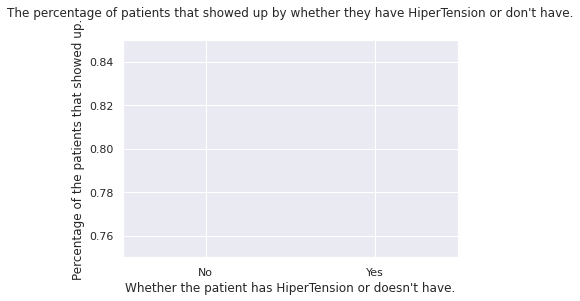

In [77]:
# Using the function to analyse the "Hibertension" column
print_stat_plot("HiperTension", "HiperTension")

The percentage of the patients that don't have diabetes and showed up is about 30.66%.
The percentage of the patients that have diabetes and showed up is about 74.66%.


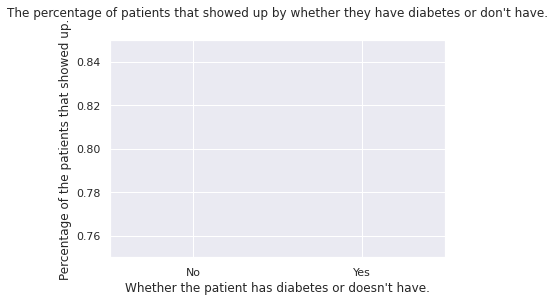

In [78]:
# Using the function to analyse the "Diabetes" column
print_stat_plot("Diabetes", "diabetes")

In [80]:
def plot_age_histogram(data, alpha=None, label=None):
    """
    Visualize the relationship between the showing up of the patient and his age using the histogram
    
    INPUT:
    df: The dataframe that we want to analyze
    alpha: The alpha parameter that will be used while plotting
    label: The label parameter that will be used while plotting
    
    """
    
    # Creating a numpy array that contains the edges of the age bins that will be used in the histogram
    # Each bin contains 5 years except the last bin that contains 15 years
    age_bins=np.append(np.arange(0,105,5),[115])
    
    # Calculating the values of the age histogram for the patients that showed up and the patients that didn't show up 
    showup_hist=np.histogram(data[data["Status"]=="Show-Up"]['Age'],bins=age_bins,range=(0,115))
    no_showup_hist=np.histogram(data[data["Status"]=="No-Show"]['Age'],bins=age_bins,range=(0,115))
    
    # Calculating the percentage values of the age histogram for the patients that showed up
    showup_rates=showup_hist[0]/(showup_hist[0]+no_showup_hist[0])
    
    # Visualizing the histogram
    locations = np.append(np.arange(2.5,100,5), [107.5])
    width = np.append(np.full((20,),5),[15])
    plt.bar(locations,showup_rates,width = width, alpha=alpha, label=label)
    plt.xlabel("Age")
    plt.ylabel("Percentage of the patients that showed up.")
    plt.title("The percentage of patients that showed up and their age.")
    plt.ylim((0.6,1))
    return


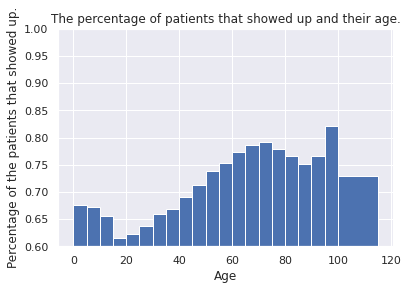

In [81]:
# Plotting the hisotogram of the age
plot_age_histogram(data)


It's concluded that the mean of showing up of the patients that are lower than 5 years old or higher than 45 years old and lower than 100 years old is generally greater than the mean of showing up of other ages.

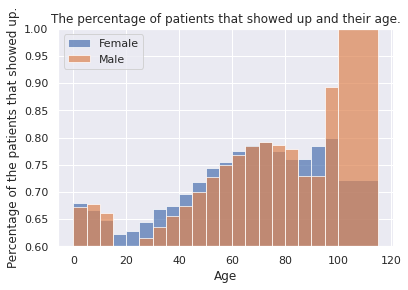

In [82]:
# Plotting the histogram of the age for females and males 
plot_age_histogram(data[data["Gender"] == "F"], alpha = 0.7, label="Female")
plot_age_histogram(data[data["Gender"] == "M"], alpha = 0.7, label="Male")
plt.legend();

It's concluded that the mean of showing up of males is very close to the mean of showing up of females in most ages.

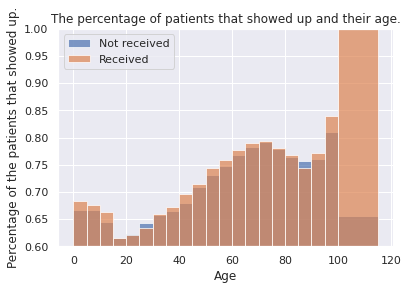

In [83]:
# Plotting the histogram of the age for the patients that received and didn't receive SMS
plot_age_histogram(data[data["SMSReminder"] == 0], alpha = 0.7, label="Not received")
plot_age_histogram(data[data["SMSReminder"] == 1], alpha = 0.7, label="Received")
plt.legend();


It's concluded that the mean of showing up of the patients that received SMS is greater than the mean of showing up of the patients that didn't received SMS in all ages.

<AxesSubplot:xlabel='Status', ylabel='count'>

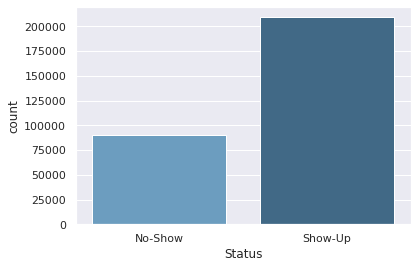

In [84]:
sns.countplot(x='Status',data=data,palette='Blues_d')

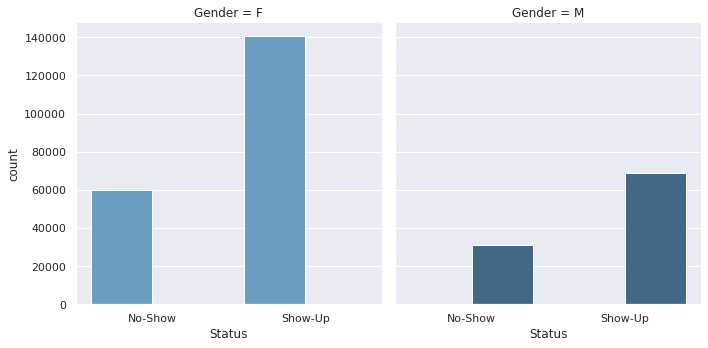

In [85]:
sns.catplot(x='Status',data=data,hue='Gender',palette='Blues_d',col='Gender',kind='count')

#### messages not sent to the patient and attend the appointment VS messages not sent to the patient and attend the appointment

In [86]:
#we want know if SMS helps patients to attend the appointment


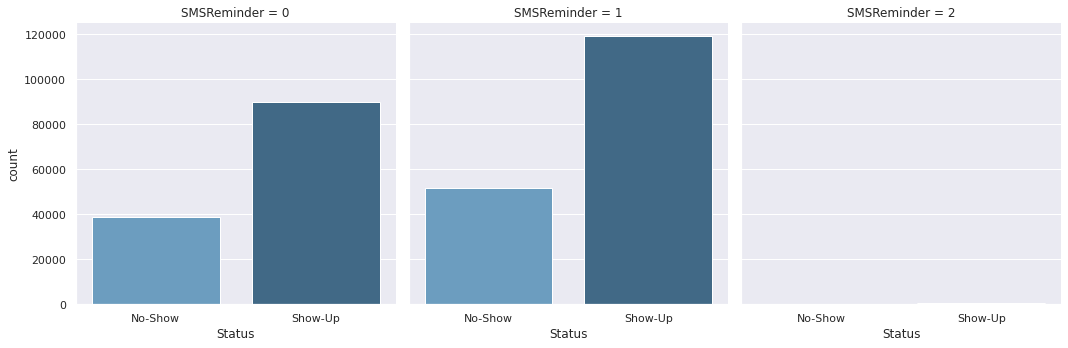

In [87]:
sns.catplot(x='Status',data=data,palette='Blues_d',col='SMSReminder',kind='count')


In [88]:
## unfortunately SMS reminder did not help patients to attend the appointment

#### number of patient who suffers from Hipertension,Diabetes,Alcoholism and Handcap

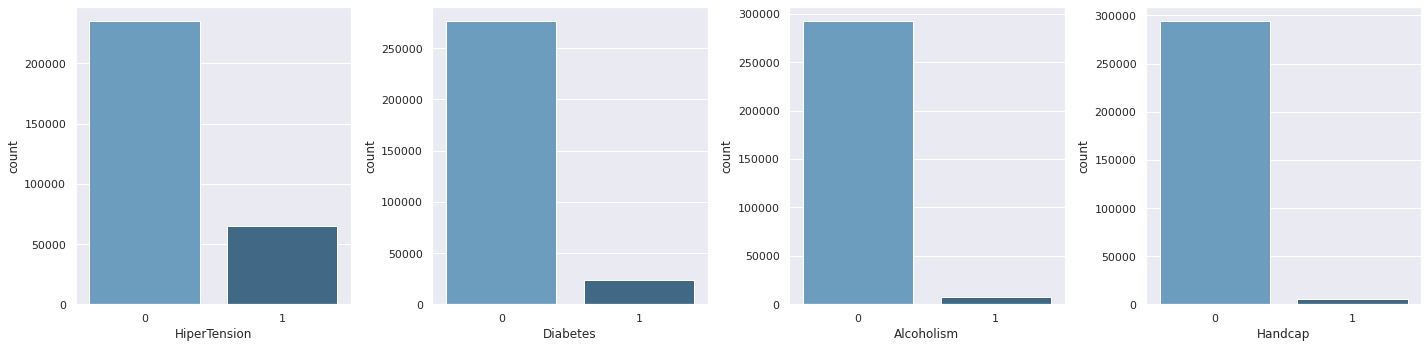

In [89]:
fig,ax=plt.subplots(nrows=1,ncols=4,figsize=(20,5))
sns.countplot(x='HiperTension' ,data=data,palette='Blues_d',ax=ax[0])
sns.countplot(x='Diabetes' ,data=data,palette='Blues_d',ax=ax[1])
sns.countplot(x='Alcoholism' ,data=data,palette='Blues_d',ax=ax[2])
sns.countplot(x='Handcap' ,data=data,palette='Blues_d',ax=ax[3])
plt.tight_layout()

In [ ]:
#This shows that the number of patients showing up more are the ones suffering from HyperTension followed by Diabetes.

### Determining whether the appointment attendance is dependent on the type of disease a patient is suffering

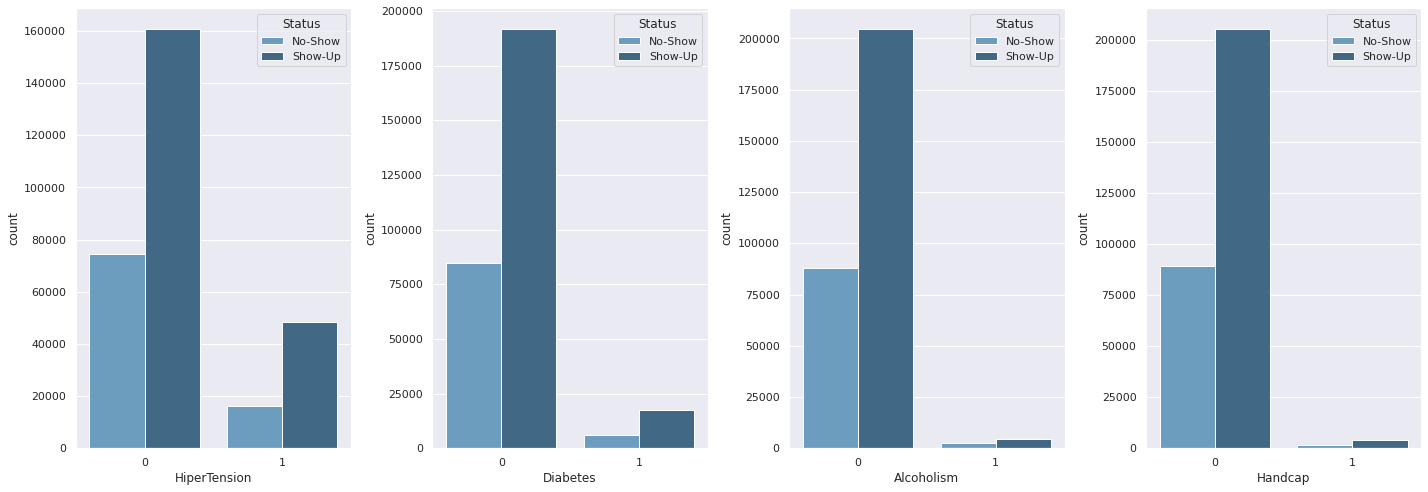

In [90]:
fig,ax=plt.subplots(nrows=1,ncols=4,figsize=(20,7))
sns.countplot(x='HiperTension' ,data=data,hue='Status',palette='Blues_d',ax=ax[0])
sns.countplot(x='Diabetes' ,data=data,hue='Status',palette='Blues_d',ax=ax[1])
sns.countplot(x='Alcoholism' ,data=data,hue='Status',palette='Blues_d',ax=ax[2])
sns.countplot(x='Handcap' ,data=data,hue='Status',palette='Blues_d',ax=ax[3])
plt.tight_layout()

1. The patient who suffers from Hipertension and attended the appointment are more (1st)
2. The patient who suffers from Diabetes and attended the appointment (2nd)
3. The patient who suffers from Alcoholism and attended the appointment (3rd)
4. The patient who suffers from Handcap and attended the appointment (4th)


### Number of male and female

F    200499
M     99495
Name: Gender, dtype: int64


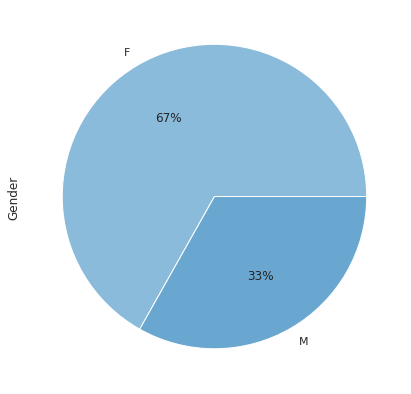

In [91]:
palette_color = sns.color_palette('Blues_d')
print(data['Gender'].value_counts())
data['Gender'].value_counts().plot(kind='pie',autopct='%1.f%%',colors=palette_color,figsize=(7,7));


In [92]:
#it is clear to say that women takes way more care of they health in comparison to men

#### Age distribution of patients



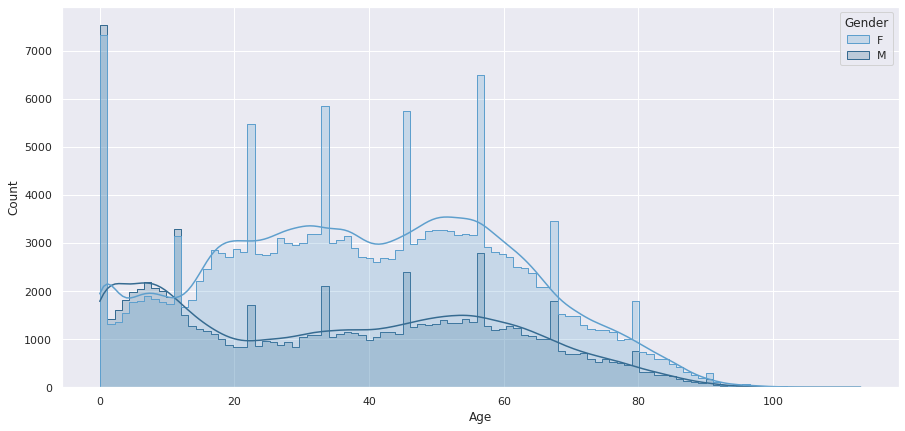

In [93]:
plt.figure(figsize=(15,7))
sns.histplot(x='Age',data=data,kde=True,hue='Gender',element='step',palette='Blues_d');


In [94]:
#the age of men appear to be the same as that of women but the number of women is biggest than men

#### Age of patients show and no show appointment

<AxesSubplot:xlabel='Age', ylabel='Count'>

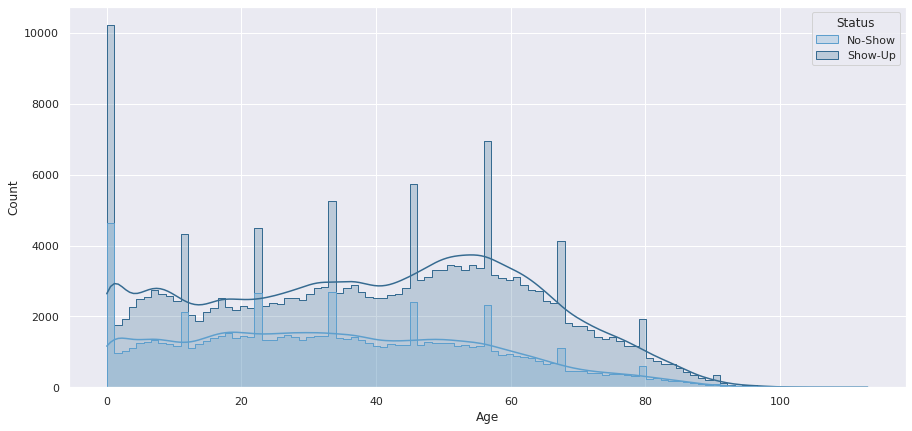

In [95]:
plt.figure(figsize=(15,7))
sns.histplot(x='Age',data=data,kde=True,hue='Status',element='step',palette='Blues_d')

Age seems to be an important factor to know in order to predict if a patient will show up for their scheduled appointment where middle-aged patients seem less prone not to show up

### day that has more appointment

<AxesSubplot:xlabel='DayOfTheWeek', ylabel='count'>

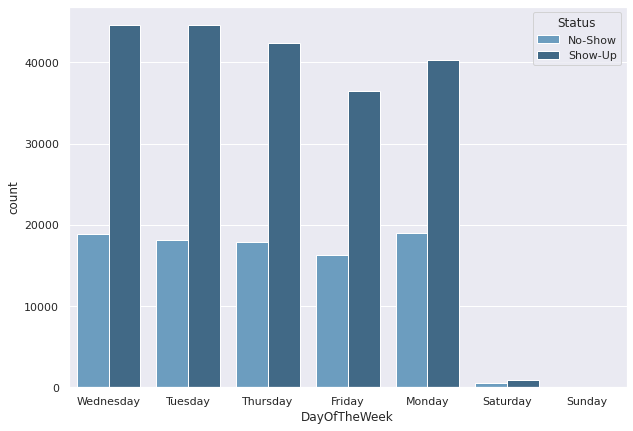

In [96]:

plt.figure(figsize=(10,7))
sns.countplot(x='DayOfTheWeek',data=data,hue='Status',palette='Blues_d')

Monday and Tuesday has the most appointments while Sunday has the least appointments 

## Model Selection 

In [97]:
data.head()

,Age,Gender,AppointmentRegistration,AppointmentData,DayOfTheWeek,Status,Diabetes,Alcoholism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,SMSReminder,AwaitingTime
0,19,M,2014-12-16,2015-01-14,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-29
1,24,F,2015-08-18,2015-08-19,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-1
2,4,F,2014-02-17,2014-02-18,Tuesday,Show-Up,0,0,0,0,0,0,0,0,-1
3,5,M,2014-07-23,2014-08-07,Thursday,Show-Up,0,0,0,0,0,0,0,1,-15
4,38,M,2015-10-21,2015-10-27,Tuesday,Show-Up,0,0,0,0,0,0,0,1,-6


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299994 entries, 0 to 299999
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Age                      299994 non-null  int64         
 1   Gender                   299994 non-null  category      
 2   AppointmentRegistration  299994 non-null  datetime64[ns]
 3   AppointmentData          299994 non-null  datetime64[ns]
 4   DayOfTheWeek             299994 non-null  object        
 5   Status                   299994 non-null  category      
 6   Diabetes                 299994 non-null  int64         
 7   Alcoholism               299994 non-null  int64         
 8   HiperTension             299994 non-null  int64         
 9   Handcap                  299994 non-null  int64         
 10  Smokes                   299994 non-null  int64         
 11  Scholarship              299994 non-null  int64         
 12  Tuberculosis    

In [ ]:
#data['Gender']=data['Gender'].astype('object')  
#data['Status']=data['Status'].astype('object')

In [99]:
#data["Gender"] = data["Gender"].map({0:"F",1: "M"})
#data["Status"] = data["Status"].map({0:"No-Show",1: "Show-Up"})

data["Gender"] = data["Gender"].apply(lambda s: 0 if s == "M" else 1)
#data["Gender"] = data["Gender"].map(lambda s: 1 if s == "F" else 0)


data["Status"] = data["Status"].map(lambda s: 1 if s == "Show-Up" else 0)
#data["Status"] = data["Status"].map(lambda s: 0 if s == "No-Show" else 1, na_action=None)
data.head(10)



,Age,Gender,AppointmentRegistration,AppointmentData,DayOfTheWeek,Status,Diabetes,Alcoholism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,SMSReminder,AwaitingTime
0,19,0,2014-12-16,2015-01-14,Wednesday,1,0,0,0,0,0,0,0,0,-29
1,24,1,2015-08-18,2015-08-19,Wednesday,1,0,0,0,0,0,0,0,0,-1
2,4,1,2014-02-17,2014-02-18,Tuesday,1,0,0,0,0,0,0,0,0,-1
3,5,0,2014-07-23,2014-08-07,Thursday,1,0,0,0,0,0,0,0,1,-15
4,38,0,2015-10-21,2015-10-27,Tuesday,1,0,0,0,0,0,0,0,1,-6
5,5,1,2014-06-17,2014-07-22,Tuesday,0,0,0,0,0,0,0,0,1,-35
6,46,1,2015-06-19,2015-07-07,Tuesday,1,0,0,0,0,0,0,0,1,-18
7,4,1,2015-08-07,2015-08-21,Friday,1,0,0,0,0,0,1,0,1,-14
8,20,1,2014-10-14,2014-10-28,Tuesday,1,0,0,0,0,0,0,0,0,-14
9,51,1,2014-06-13,2014-06-17,Tuesday,1,1,0,1,0,0,0,0,1,-4


In [100]:
data.Gender.unique()

[0, 1]
Categories (2, int64): [1, 0]

In [101]:
data.Status.unique()

[1, 0]
Categories (2, int64): [0, 1]

In [102]:
X = data.drop(['AppointmentRegistration','AppointmentData','DayOfTheWeek','Status'], axis=1)
y = data['Status']

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=17)

As this is a problem of binary classification, I will use a Logistic Regression algorithm, as it is one of the most powerful algorithms for a binary classification model.

In [104]:
clf = LogisticRegression().fit(X_train, y_train)

# Make predictions on test set
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred, y_test))


0.6984818028464934


/home/nyingi/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [105]:
print(confusion_matrix(y_test, y_pred))

[[  126 29691]
 [  159 69023]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [106]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy_score(y_test, y_pred)

0.6456226830574047

### Evaluating the Fraud Detection Model

In [ ]:
# Compare test set predictions with ground truth labels
print(confusion_matrix(y_test, y_pred))

1. 69023 patients showed up for their appointment 
2. 126 patients did not show up


### Conclusion and insights

1. Woman takes way more care of they health in comparison to man.
2.  Hypertension is factor for higher attendance frequency.
3.  Hypertension is strong feature for affect showing of the patients.
4. Saturday and Sunday may be holidays since it has the least number of patient's attendance
5. Handicap column has five different values(0,1,2,3,4) after alot of research I figured out that 1 to 4 is handicapped with difference precentage of the handicap, so I converted (1,2,3,4) to 1 that means handicap and 0 not handicapped.
